In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Data

In [26]:
df = pd.read_csv('/Users/beyazituysal/Documents/PythonProjects/MLalgorithm/datasets/diabetes.csv')

In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df.shape

(768, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [31]:
#null check
df.isnull().sum()/len(df)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

# Data Cleaning

## TR / ENG

Veri setinde null değer yok ama fazlasıyla sıfır var hem de olmaması gereken değerler sıfır ben de bu sıfırları ortalama değerlere ve internette yaptığım araştırmalara göre düzelticem.

#### Glucose

In [32]:
Glucose_mean = df.loc[df['Glucose'] != 0, 'Glucose'].mean()
print(f'Glucose mean is : {Glucose_mean:.2f}')

Glucose mean is : 121.69


Glucose ortalaması 121 çıktı, bu değeri bozmamak amacıyla 0 olan değerleri 110 ile 130 arasında değiştircem.

Glucose mean is a 121. I'll replace the 0 values with in 110-130

In [33]:
# 0 değerlerini seç
zero_indices = df[df['Glucose'] == 0].index

# Seçilen 0 değerlerini rastgele sayılarla değiştir
df.loc[zero_indices, 'Glucose'] = np.random.randint(low=90, high=111, size=len(zero_indices))

#### BloodPressure

In [34]:
BloodPressure_mean = df.loc[df['BloodPressure'] != 0, 'BloodPressure'].mean()
print(f'BloodPressure mean is : {BloodPressure_mean:.2f}')

BloodPressure mean is : 72.41


BloodPressure ortalaması 72 çıktı, bu değeri bozmamak amacıyla 0 olan değerleri 62 ile 82 arasında değiştircem.

BloodPressure mean is a 72. I'll replace the 0 values with in 62-82

In [35]:
# 0 değerlerini seç
zero_indices = df[df['BloodPressure'] == 0].index

# Seçilen 0 değerlerini rastgele sayılarla değiştir
df.loc[zero_indices, 'BloodPressure'] = np.random.randint(low=62, high=82, size=len(zero_indices))

#### SkinThickness

In [36]:
SkinThickness_mean = df.loc[df['SkinThickness'] != 0, 'SkinThickness'].mean()
print(f'Skin Thickness mean is : {SkinThickness_mean:.2f}')

Skin Thickness mean is : 29.15


SkinThickness in ortalaması 29 ben de bunun için 0 (sıfır) olan verilere 26 ile 32 arasında bir değer atıcam

SkinThickness mean is a 29. I'll replace the 0 values with in 26-32

In [37]:
# 0 değerlerini seç
zero_indices = df[df['SkinThickness'] == 0].index

# Seçilen 0 değerlerini rastgele sayılarla değiştir
df.loc[zero_indices, 'SkinThickness'] = np.random.randint(low=26, high=33, size=len(zero_indices))

#### Insulin

In [38]:
Insulin_mean = df.loc[df['Insulin'] != 0, 'Insulin'].mean()
print(f'Insulin mean is : {Insulin_mean:.2f}')

Insulin mean is : 155.55


Insulin ortalaması 155 çıktı. İnternetten araştırdığım zaman 174 den az olduğunu söylüyordu bu yüzden veri setini çok değiştirmemek için 0 (sıfır) olan verileri 145 ve 165 arasında değiştiricem.

Insulin mean is a 155. When I searched the internet it said it was less than 174 so I'll replace the 0 values with in 125-185.

In [39]:
# 0 değerlerini seç
zero_indices = df[df['Insulin'] == 0].index

# Seçilen 0 değerlerini rastgele sayılarla değiştir
df.loc[zero_indices, 'Insulin'] = np.random.randint(low=125, high=186, size=len(zero_indices))

#### BMI (Body mass index)

In [40]:
BMI_mean = df.loc[df['BMI'] != 0, 'BMI'].mean()
print(f'Body mass index mean is : {BMI_mean:.2f}')

Body mass index mean is : 32.46


BMI (Body mass index) ortalaması 32 çıktı bunun için oralamaya bağlı kalarak 28 ile 36 arasında sayılarla değiştiricez sıfırları.

BMI (Body mass index) mean is a 32. I'll replace the 0 values with in 28-36

In [41]:
# 0 değerlerini seç
zero_indices = df[df['BMI'] == 0].index

# Seçilen 0 değerlerini rastgele sayılarla değiştir
df.loc[zero_indices, 'BMI'] = np.random.randint(low=28, high=37, size=len(zero_indices))

#### DiabetesPedigreeFunction

DiabetesPedigreeFunction ve Age kolonlarında 0 değeri bulunmamakta
Pregnancies kolonunda ise hiç doğum yapmamış hastalar olabileceği için 0 ları değiştirmemize gerek yok

DiabetesPedigreeFunction and Age columns do not have zero values
In the Pregnancies column, we do not need to change the zeros as there may be patients who have never given birth.

# EDA

## Box Plot

<AxesSubplot: xlabel='Outcome', ylabel='Age'>

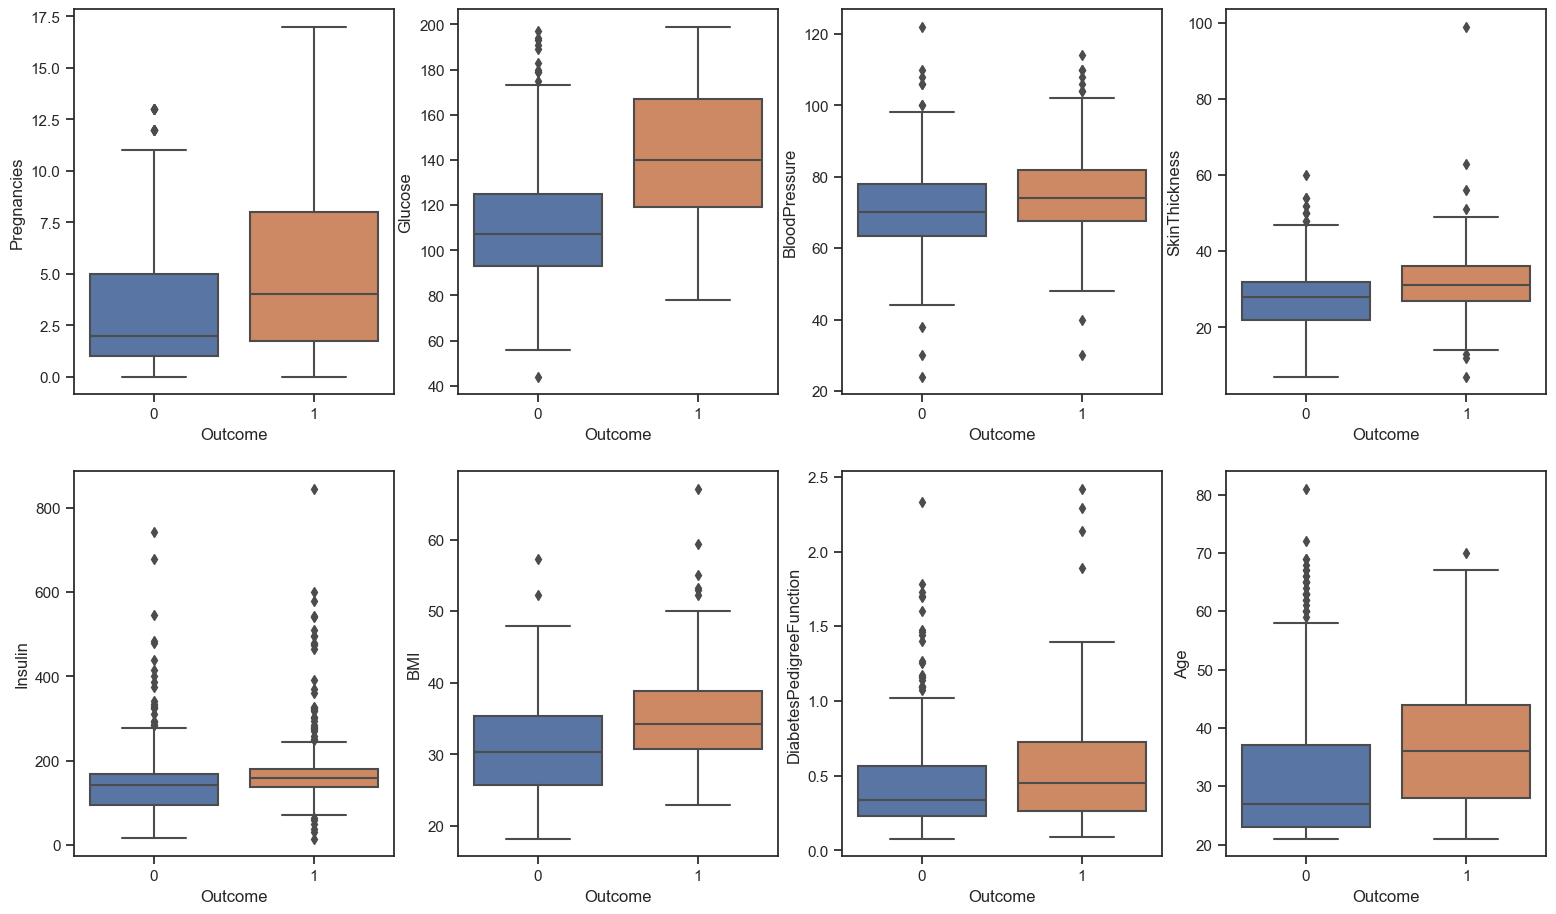

In [42]:
sns.set(style='ticks')
plt.figure(figsize=(19,11))
plt.subplot(2,4,1)
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.subplot(2,4,2)
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.subplot(2,4,3)
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.subplot(2,4,4)
sns.boxplot(x='Outcome', y='SkinThickness', data=df)
plt.subplot(2,4,5)
sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.subplot(2,4,6)
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.subplot(2,4,7)
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.subplot(2,4,8)
sns.boxplot(x='Outcome', y='Age', data=df)

## Violin Plot

<AxesSubplot: xlabel='Outcome', ylabel='Age'>

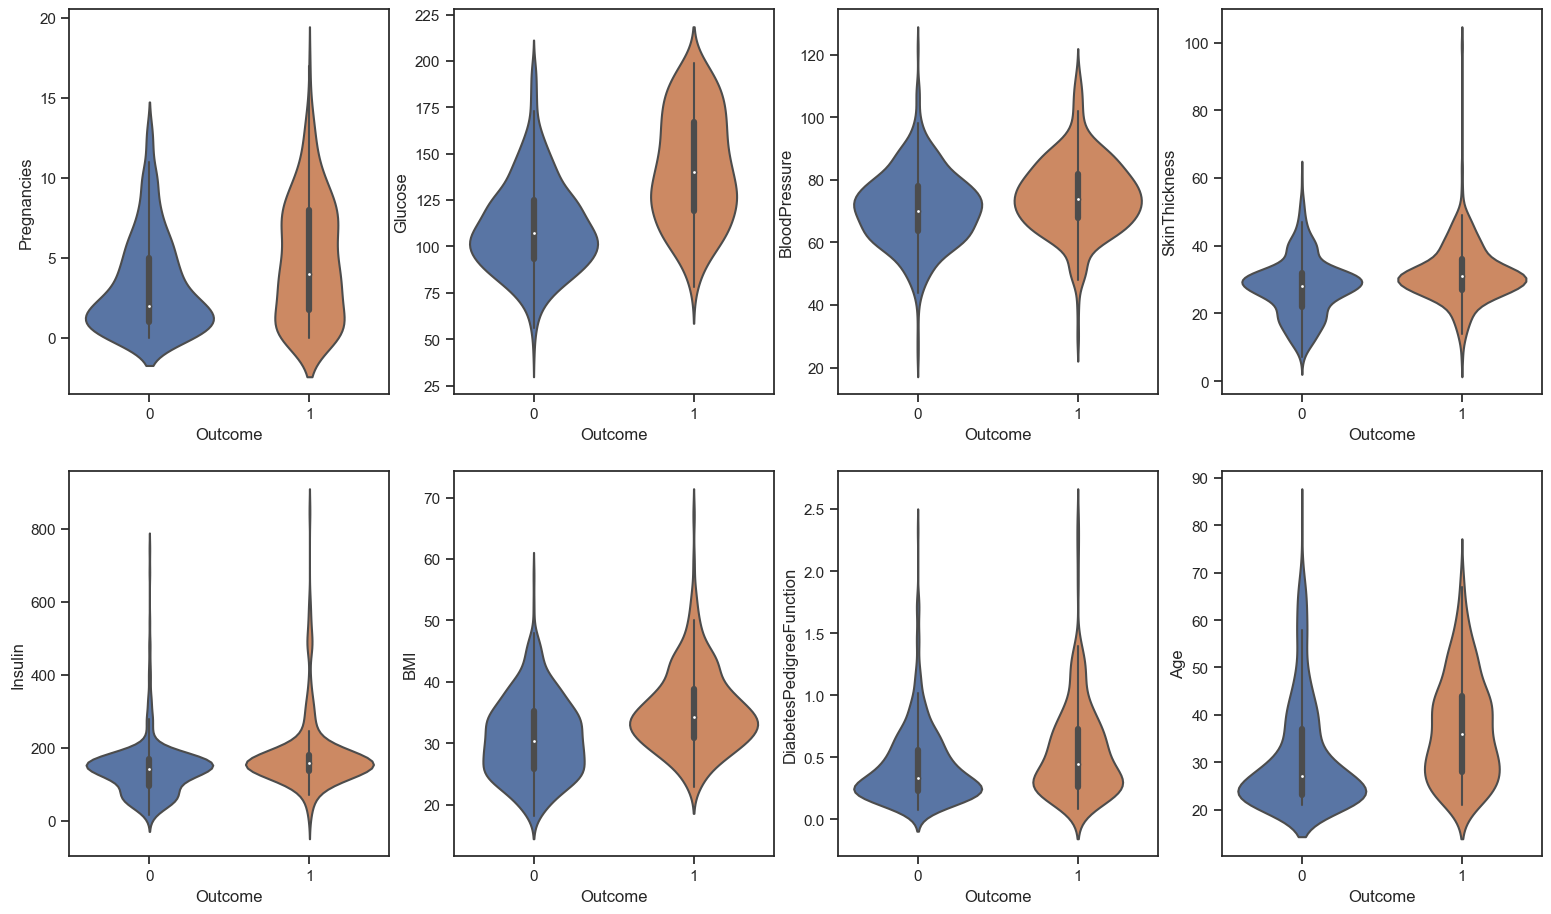

In [43]:
sns.set(style='ticks')
plt.figure(figsize=(19,11))
plt.subplot(2,4,1)
sns.violinplot(x='Outcome', y='Pregnancies', data=df)
plt.subplot(2,4,2)
sns.violinplot(x='Outcome', y='Glucose', data=df)
plt.subplot(2,4,3)
sns.violinplot(x='Outcome', y='BloodPressure', data=df)
plt.subplot(2,4,4)
sns.violinplot(x='Outcome', y='SkinThickness', data=df)
plt.subplot(2,4,5)
sns.violinplot(x='Outcome', y='Insulin', data=df)
plt.subplot(2,4,6)
sns.violinplot(x='Outcome', y='BMI', data=df)
plt.subplot(2,4,7)
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.subplot(2,4,8)
sns.violinplot(x='Outcome', y='Age', data=df)

In [44]:
# rename the DiabetesPedigreeFunction column, becaouse name is too long
df.rename(columns = {'DiabetesPedigreeFunction':'DPF'}, inplace = True)

[]

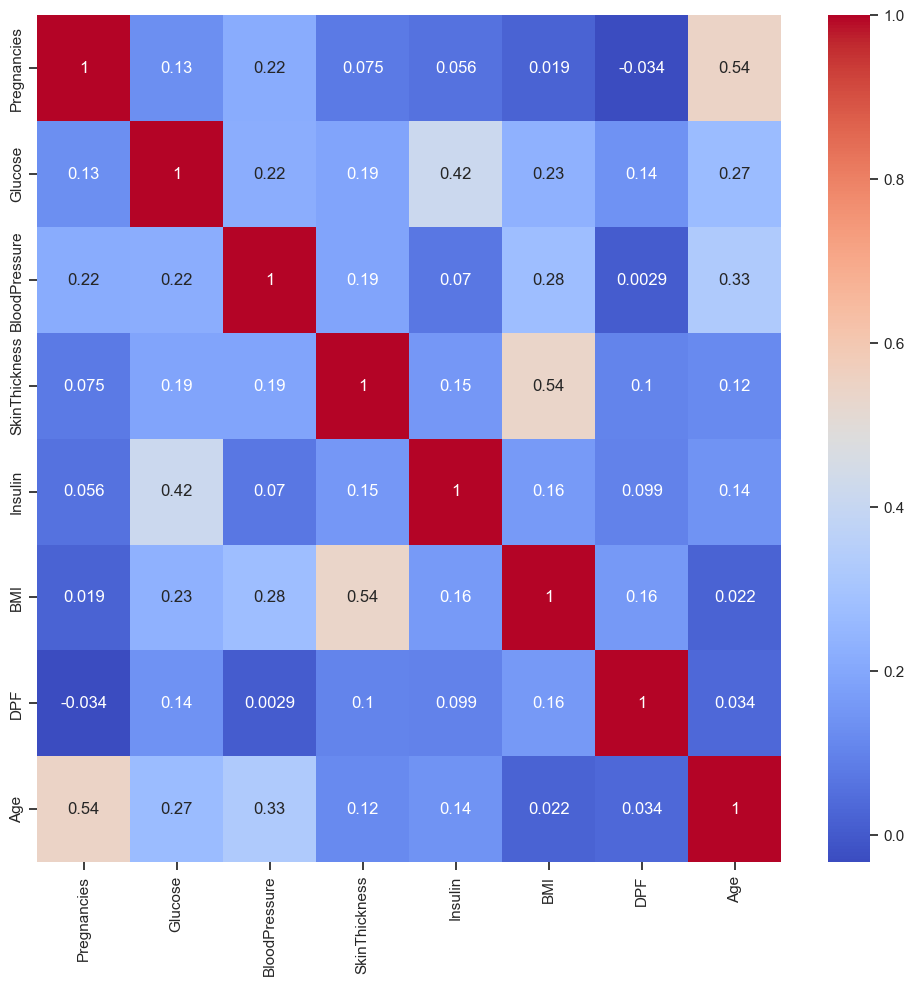

In [45]:
df_without_output = df.drop(['Outcome'], axis=1)
plt.figure(figsize=(12,11))
sns.heatmap(df_without_output.corr(), annot=True, cmap='coolwarm')
plt.plot()

<AxesSubplot: title={'center': 'Age and Pregnancies'}, xlabel='Age', ylabel='Pregnancies'>

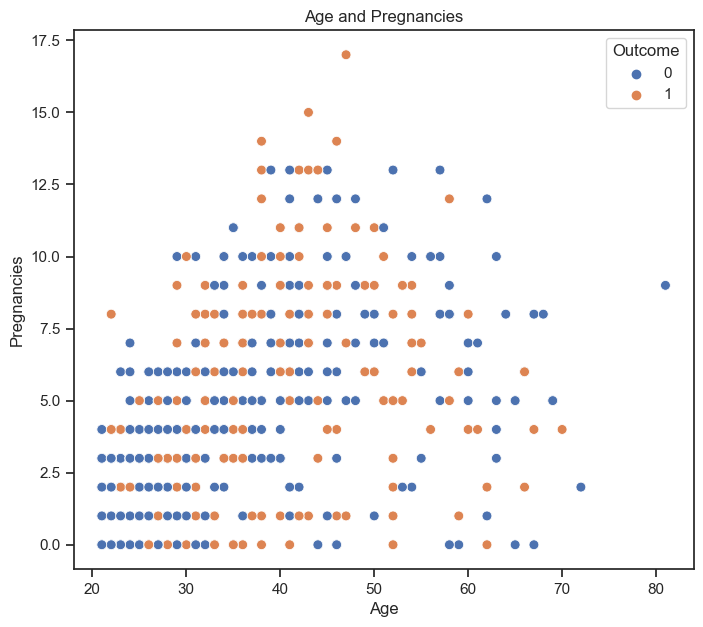

In [46]:
plt.figure(figsize=(8,7))
plt.title('Age and Pregnancies')
sns.scatterplot(data=df,x='Age',y='Pregnancies',hue='Outcome',s=50)

<AxesSubplot: title={'center': 'Insulin and Skin Thickness'}, xlabel='Insulin', ylabel='SkinThickness'>

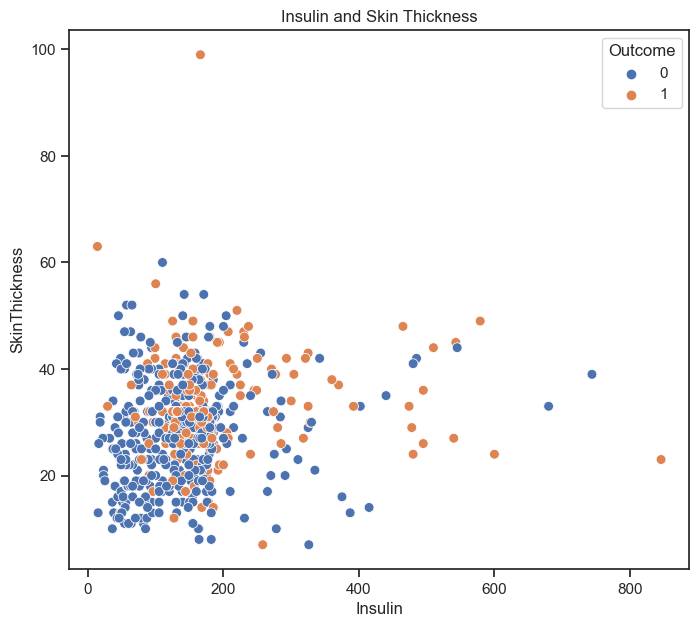

In [47]:
plt.figure(figsize=(8,7))
plt.title('Insulin and Skin Thickness')
sns.scatterplot(data=df,x='Insulin',y='SkinThickness',hue='Outcome',s=50)

<AxesSubplot: title={'center': 'BMI and Skin Thickness'}, xlabel='BMI', ylabel='SkinThickness'>

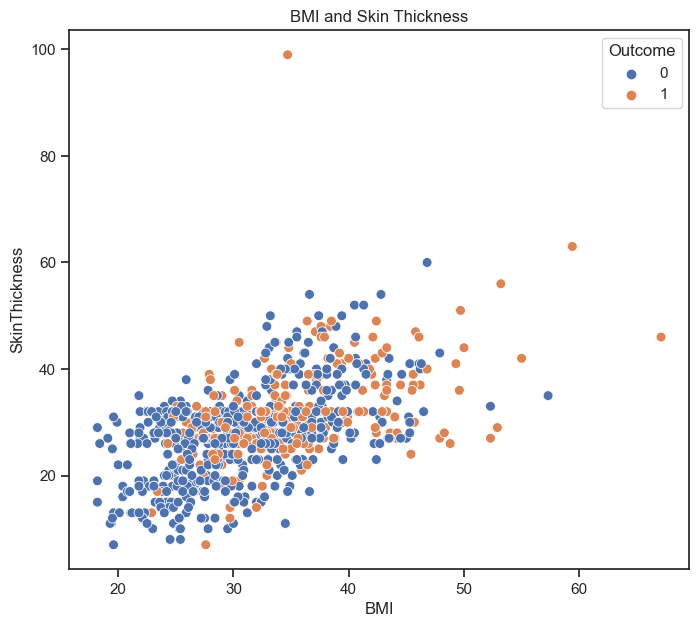

In [48]:
plt.figure(figsize=(8,7))
plt.title('BMI and Skin Thickness')
sns.scatterplot(data=df,x='BMI',y='SkinThickness',hue='Outcome',s=50)

## Uni-Variate Analysis

In [49]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

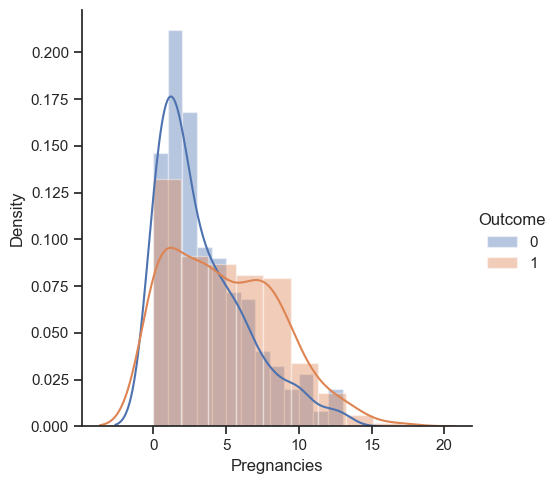

In [50]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'Pregnancies').add_legend();

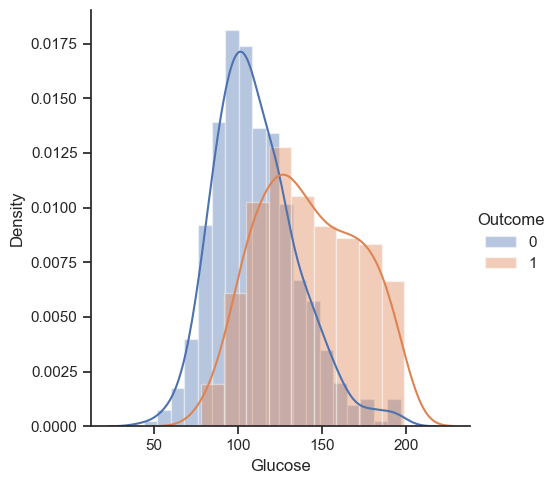

In [51]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'Glucose').add_legend();

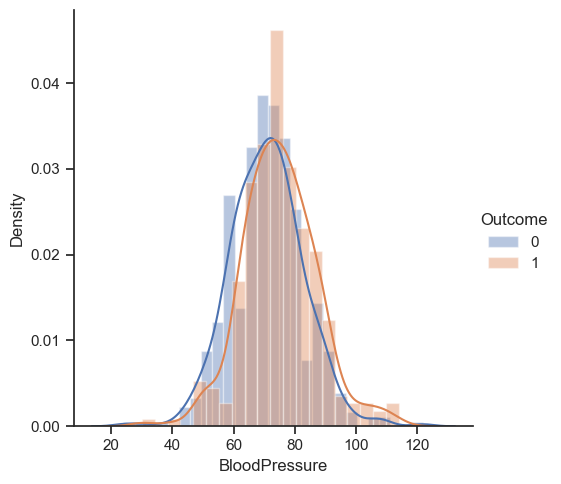

In [52]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'BloodPressure').add_legend();

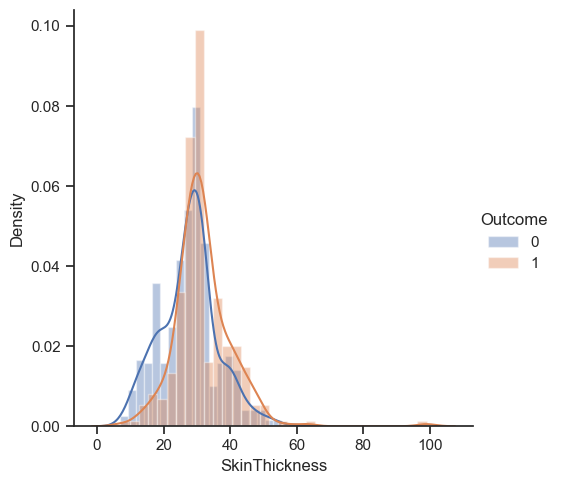

In [53]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'SkinThickness').add_legend();

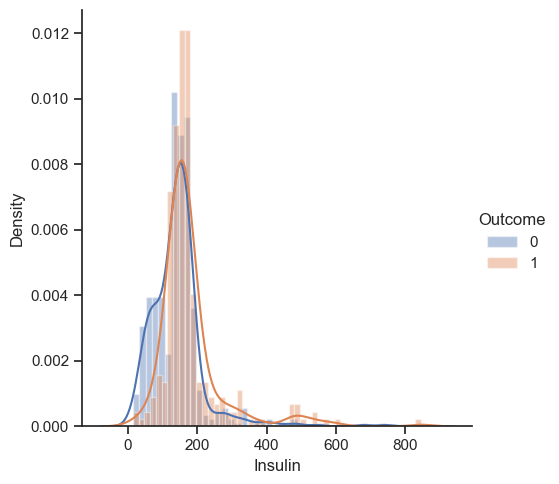

In [54]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'Insulin').add_legend();

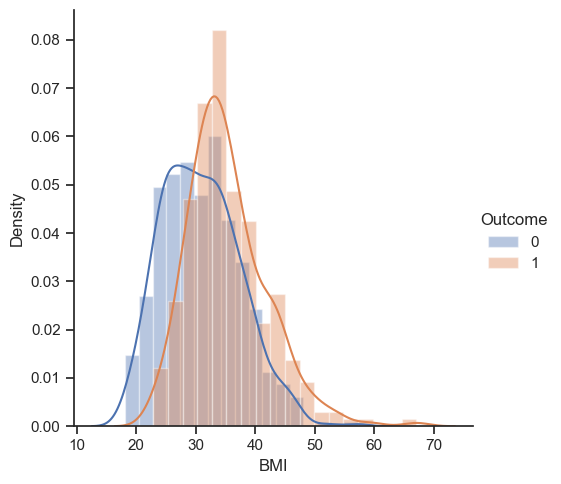

In [55]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'BMI').add_legend();

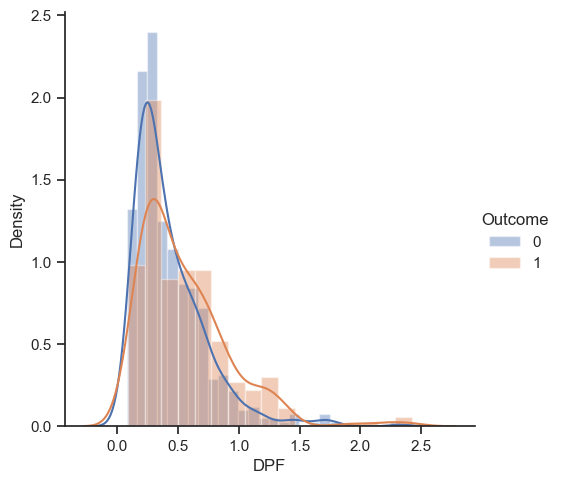

In [56]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'DPF').add_legend();

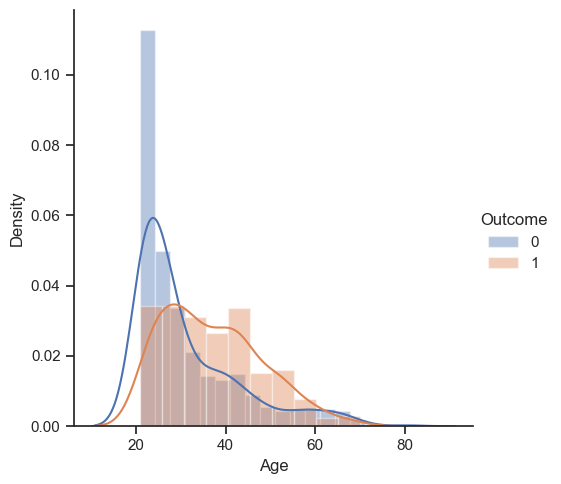

In [57]:
sns.FacetGrid(df, hue='Outcome', height=5).map(sns.distplot,'Age').add_legend();

# Classification

In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,131,33.6,0.627,50,1
1,1,85,66,29,165,26.6,0.351,31,0
2,8,183,64,28,128,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Train and Test

### Preparing x and y


In [59]:
X = df.drop(['Outcome'],axis=1)
y = df.Outcome

### Train test split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

## Model

### LogisticRegression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
# Fit
lr = LogisticRegression()
lr.fit(X_train,y_train)

# prediction
y_pred = lr.predict(X_test)

In [81]:
lr_score = accuracy_score(y_test,y_pred)
print(f"Score %{(lr_score*100):.2f}")

Score %80.52


In [82]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[94 13]
 [17 30]]


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154



### KNeighborsClassifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier

Max Train Score : %100.00 - K : [1]
Max Test Score : %80.52 - Best K : [8]


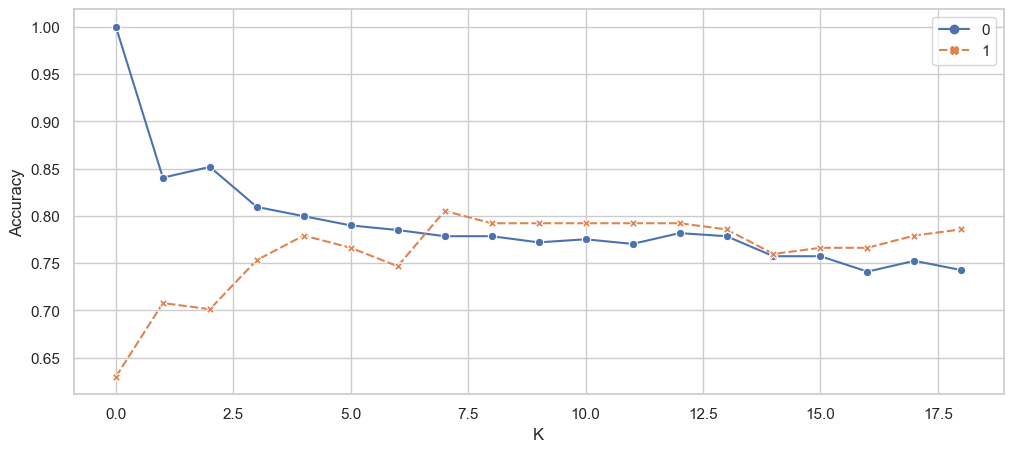

In [85]:
test_train_scores = []

for i in range(1, 20):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    test_train_scores.append((train_score, test_score))

test_train_scores = np.array(test_train_scores)

max_train_score = np.max(test_train_scores[:,0])
train_score_ind = np.where(test_train_scores[:,0] == max_train_score)[0] + 1
max_test_score = np.max(test_train_scores[:,1])
test_score_ind = np.where(test_train_scores[:,1] == max_test_score)[0] + 1

print(f'Max Train Score : %{max_train_score * 100:.2f} - K : {train_score_ind}')
print(f'Max Test Score : %{max_test_score * 100:.2f} - Best K : {test_score_ind}')

sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
sns.lineplot(data=test_train_scores, markers=True)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

### GaussianNB

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
# Train the Random Forest classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = gnb.predict(X_test)

In [88]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.57%


In [89]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[92 15]
 [18 29]]


In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154



### RandomForestClassifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
# Train the Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = rfc.predict(X_test)

In [93]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.57%


In [94]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[91 16]
 [17 30]]


In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       107
           1       0.65      0.64      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.78      0.79      0.79       154

